# Predicting heart disease using machine learning

In [362]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

In [363]:
df = pd.read_csv("heart-disease.csv")

df.shape

(303, 14)

In [364]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [365]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

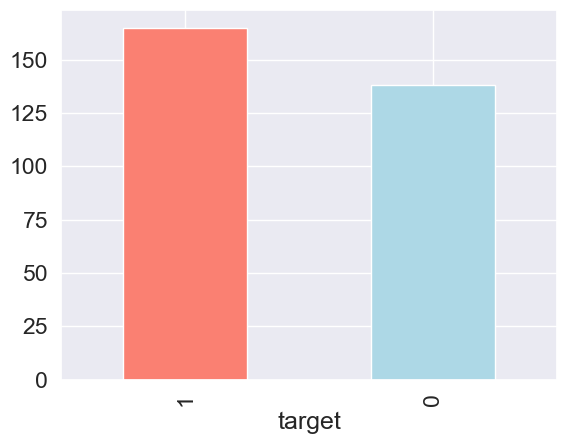

In [366]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'Lightblue']);


In [367]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [368]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [369]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Hearth disease frequency to sex

In [370]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [371]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


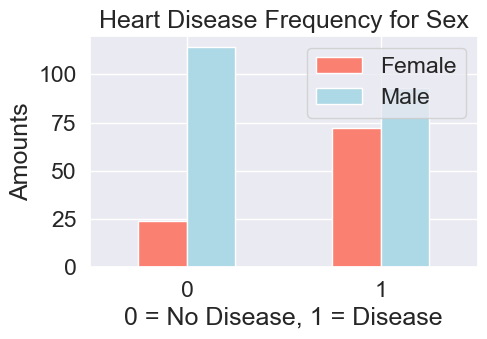

In [372]:
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(5,3),
                                   color=['salmon', 'Lightblue'])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amounts')
plt.legend(['Female', "Male"]);
plt.xticks(rotation=0);

In [373]:
df.age[df.target==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

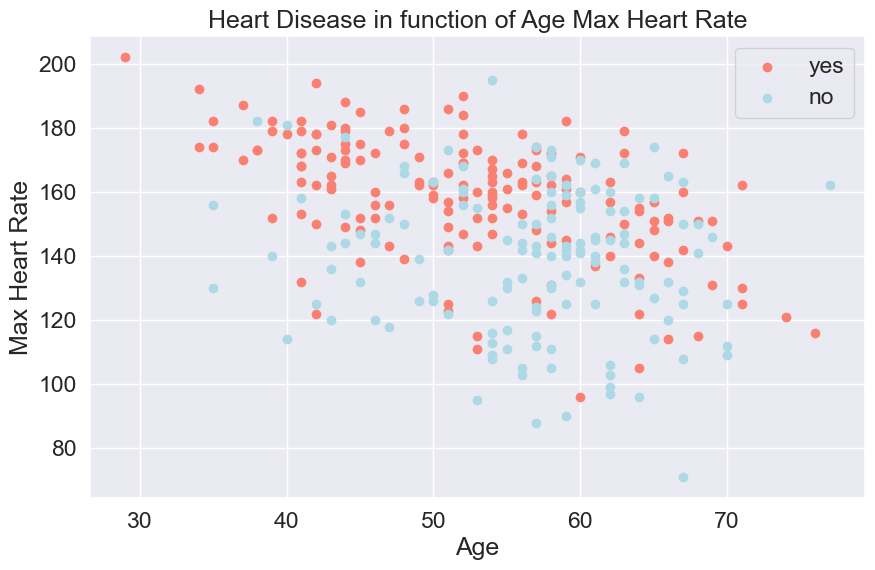

In [374]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='salmon')

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='Lightblue')

plt.title('Heart Disease in function of Age Max Heart Rate')
plt.xlabel('Age')
plt.ylabel("Max Heart Rate")
plt.legend(['yes', 'no']);

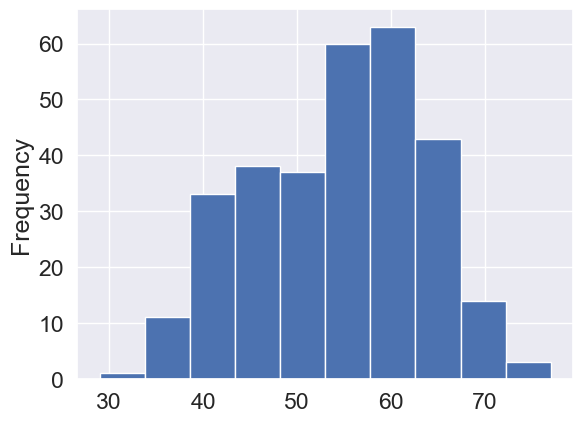

In [375]:
df.age.plot.hist();

In [376]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


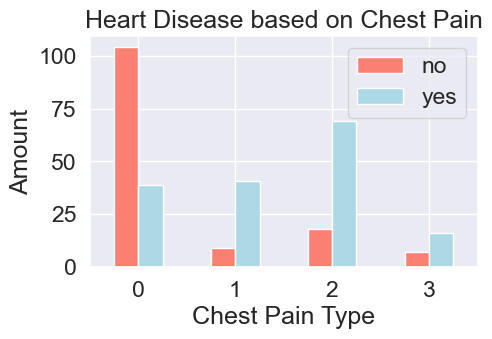

In [377]:
pd.crosstab(df.cp, df.target).plot(figsize=(5,3),
                                  kind='bar',
                                  color=['salmon', 'Lightblue'])

plt.title('Heart Disease based on Chest Pain')
plt.xlabel("Chest Pain Type")
plt.ylabel('Amount')
plt.legend(['no', 'yes'])
plt.xticks(rotation=0);

In [378]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


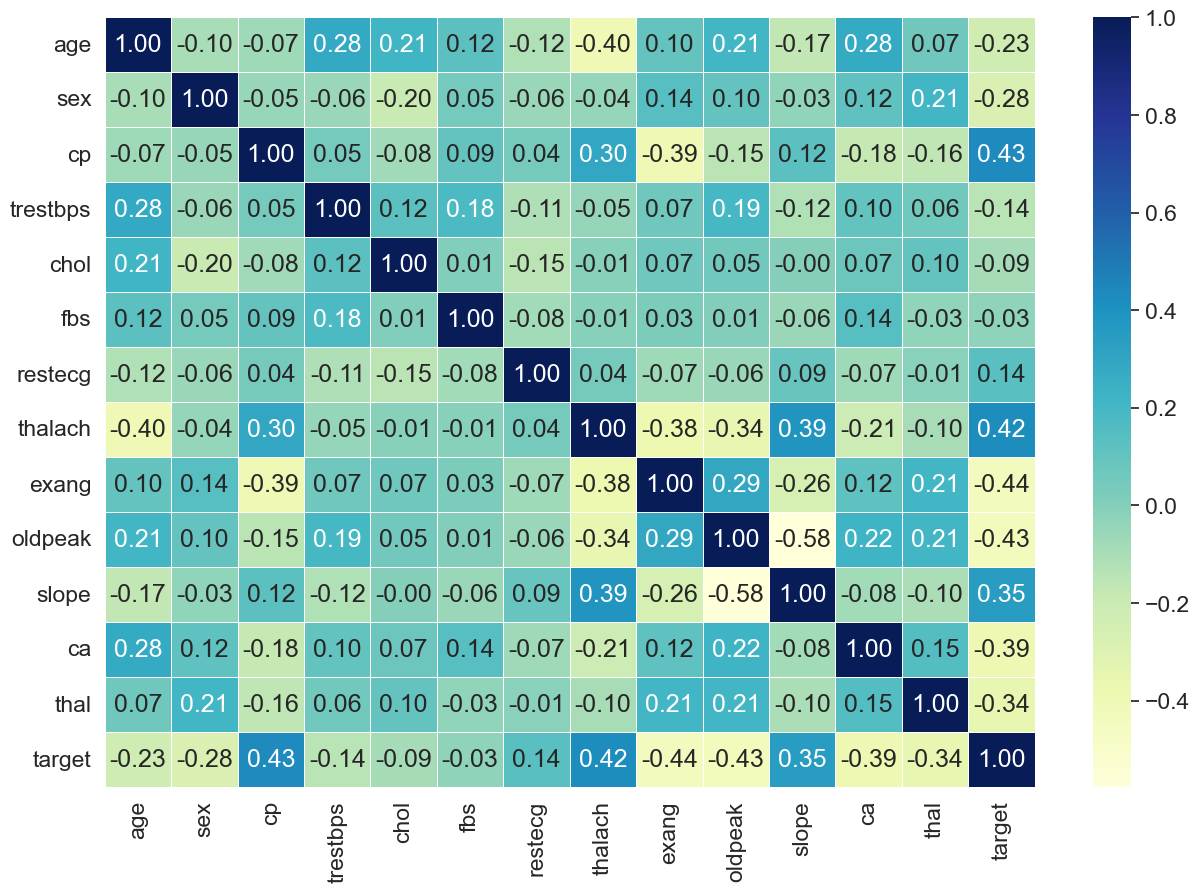

In [379]:
corr_matrix = df.corr()
fix, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap="YlGnBu")

### modeling

In [380]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [381]:
x = df.drop('target', axis=1)
y = df['target']

In [382]:
np.random.seed(42)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)



In [383]:
models = {'Logistic Regression': LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

def fit_and_score(models, xtrain, xtest, ytrain, ytest):
    """
    fit and evaluate given machine learning models.
    """
    np.random.seed(42)

    model_score={}

    for name, model in models.items():
        model.fit(xtrain, ytrain)
        model_score[name] = model.score(xtest, ytest)
    return model_score

In [384]:
model_score = fit_and_score(models=models,
                           xtrain=xtrain,
                           ytrain=ytrain,
                           xtest=xtest,
                           ytest=ytest)

model_score

C:\Users\o\Desktop\ml\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

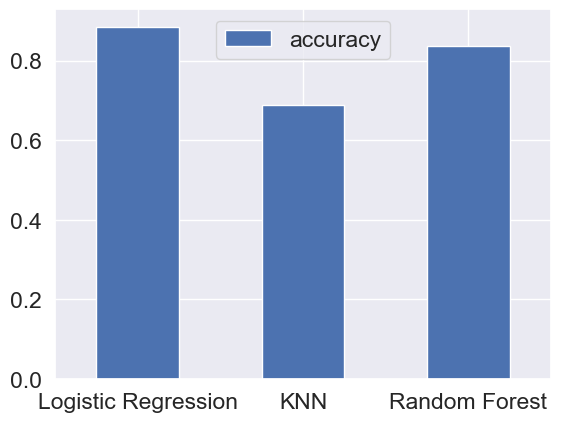

In [385]:
model_compare = pd.DataFrame(model_score, index=['accuracy'])
model_compare.T.plot.bar()
plt.xticks(rotation=0);
plt.savefig(r"pics/model-compare.png")

In [386]:
train_score = []
test_score = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(xtrain, ytrain)

    train_score.append(knn.score(xtrain, ytrain))

    test_score.append(knn.score(xtest, ytest))

In [387]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [388]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

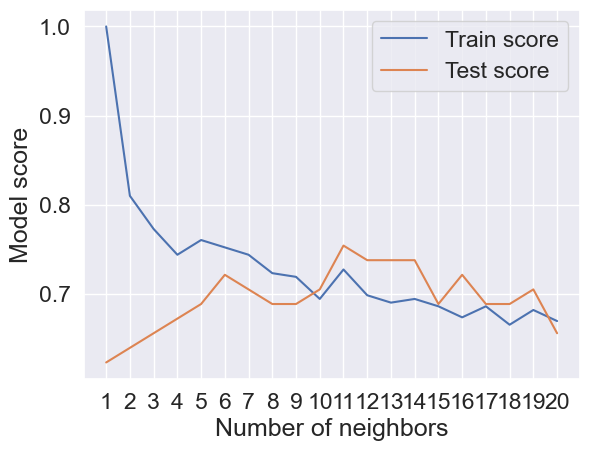

In [389]:
plt.plot(neighbors, train_score, label='Train score')
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend();



In [390]:
log_reg_grid = {'C': np.logspace(-4, 4, 20),
       'solver': ['liblinear']}

rf_grid = {'n_estimators': np.arange(10, 1000, 50),
          'max_depth': [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [391]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

rs_log_reg.fit(xtrain, ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [392]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [393]:
rs_log_reg.score(xtest, ytest)

0.8852459016393442

In [394]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=1)

rs_rf.fit(xtrain, ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [395]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [396]:
rs_rf.score(xtest, ytest)

0.8688524590163934

In [397]:
model_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [398]:
log_reg_grid = {'C': np.logspace(-4, 4, 30),
               'solver': ['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(xtrain, ytrain)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,LogisticRegression()
,param_grid,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [399]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [400]:
gs_log_reg.score(xtest, ytest)

0.8852459016393442

In [401]:
ypreds = gs_log_reg.predict(xtest)

In [402]:
ypreds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [403]:
from sklearn.metrics import RocCurveDisplay

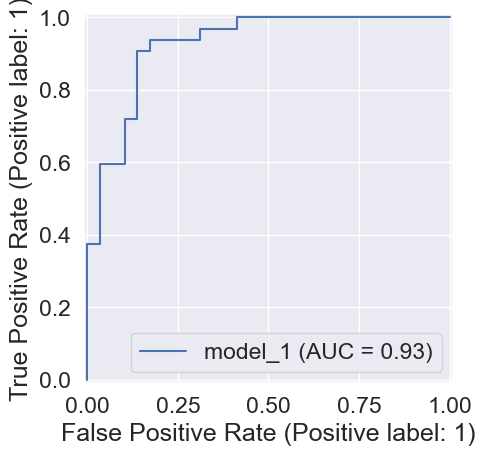

In [404]:
RocCurveDisplay.from_estimator(gs_log_reg, xtest, ytest, name="model_1")
plt.savefig('pics/roc-curve-model1.png', bbox_inches='tight')

In [405]:
print(confusion_matrix(ytest, ypreds))

[[25  4]
 [ 3 29]]


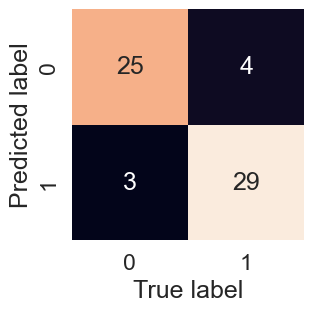

In [406]:
sns.set(font_scale=1.5)

def plot_conf_mat(ytest, yreds):
    """
    Plot a nice loking confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(ytest, ypreds),
                    annot= True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(ytest, ypreds)
plt.savefig(r'pics/confusion-matrix-model1.png', bbox_inches='tight')

In [407]:
print(classification_report(ytest,  ypreds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [408]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [409]:
clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')


In [410]:
cross_validated = {'accuracy':'accuracy' ,'precision':'precision', 'recall':'recall', 'f1':'f1'}
results = {}
for k,v in cross_validated.items():
    c = cross_val_score(clf, x, y, cv=5,
                   scoring=v)
    
    results[k]= float(c.mean())


results

{'accuracy': 0.8446994535519124,
 'precision': 0.8207936507936507,
 'recall': 0.9212121212121213,
 'f1': 0.8673007976269721}

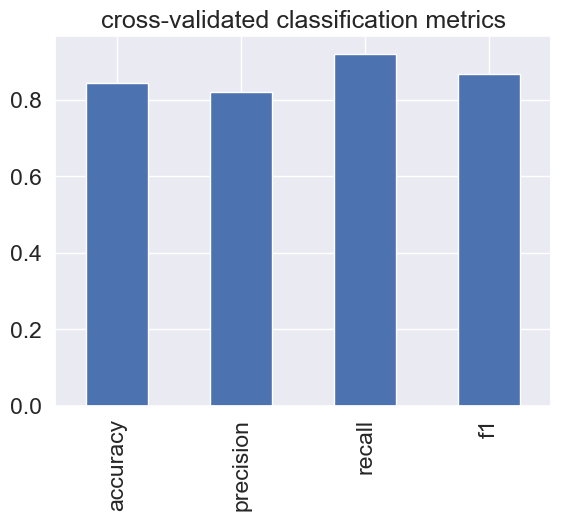

In [411]:
cv_metrics = pd.DataFrame(results, index=[0])

cv_metrics.T.plot.bar(title="cross-validated classification metrics",
                     legend=False);

In [412]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [413]:
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')
clf.fit(xtrain, ytrain)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.20433597178569418
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [414]:
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [415]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [416]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0031672721856887734),
 'sex': np.float64(-0.860445816920919),
 'cp': np.float64(0.6606707303492849),
 'trestbps': np.float64(-0.011569930902919925),
 'chol': np.float64(-0.001663741604035976),
 'fbs': np.float64(0.04386130751482091),
 'restecg': np.float64(0.3127578715206996),
 'thalach': np.float64(0.02459360818122666),
 'exang': np.float64(-0.6041303799858143),
 'oldpeak': np.float64(-0.5686285194546157),
 'slope': np.float64(0.4505161679452401),
 'ca': np.float64(-0.6360986316921434),
 'thal': np.float64(-0.6766337521354281)}

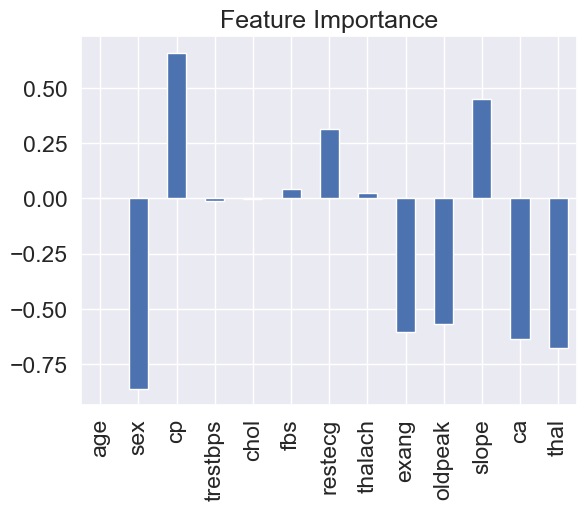

In [417]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);
plt.savefig(r'pics/feature-importance-before-feature-engineering.png', bbox_inches='tight')

In [418]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [419]:
df['risk'] = df['chol']/df['age']

In [420]:
col = df.pop('risk')
df.insert(13, 'risk', col)

In [421]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,risk,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,3.698413,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,6.756757,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,4.975610,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,4.214286,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,6.210526,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,4.228070,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,5.866667,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,2.838235,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,2.298246,0


In [422]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
risk        292
target        2
dtype: int64

In [423]:
!pip install imbalanced-learn

In [424]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [425]:
np.random.seed(42)

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer,
    categorical_cols)])

pipe = ImbPipeline(steps=[
    ('preproc', preprocessor),
    ('smote', SMOTE()),
    ('clf',clf)])

x = df.drop('target', axis=1)
y = df['target']
xtrain, xtest, ytrain, ytest = train_test_split(x ,y, test_size=0.2)

pipe.fit(xtrain, ytrain)

,steps,"[('preproc', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [426]:
ypreds = pipe.predict(xtest)
print(classification_report(ytest, ypreds))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [427]:
pipe.score(xtest, ytest)

0.8852459016393442

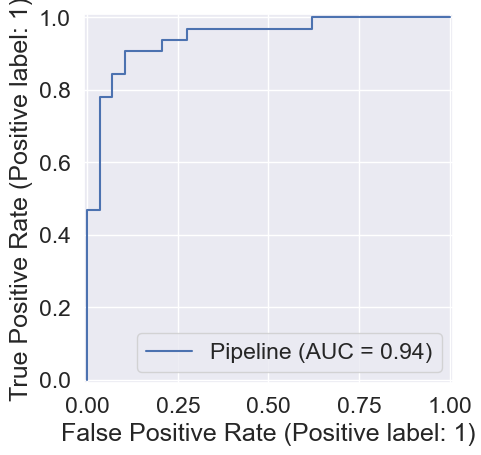

In [428]:
RocCurveDisplay.from_estimator(estimator=pipe,
                              X=xtest,
                              y=ytest);
plt.savefig(r'pics/roc-curve-model2.png', bbox_inches='tight')

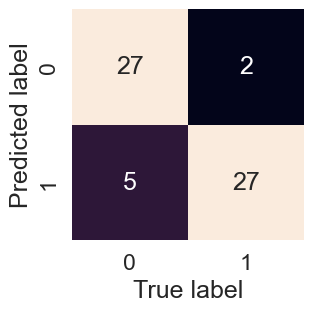

In [429]:
plot_conf_mat(ytest, ypreds)
plt.savefig(r'pics/confusion-matrix-model2.png', bbox_inches='tight')

In [430]:
cross_validated = {'accuracy':'accuracy' ,'precision':'precision', 'recall':'recall', 'f1':'f1'}
results2 = {}
for k,v in cross_validated.items():
    c = cross_val_score(pipe, x, y, cv=5,
                   scoring=v)

    results2[k]= float(c.mean())


results2

{'accuracy': 0.848032786885246,
 'precision': 0.860009225526467,
 'recall': 0.8787878787878789,
 'f1': 0.8589253911601414}

In [431]:
pipe.fit(xtrain, ytrain)

,steps,"[('preproc', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


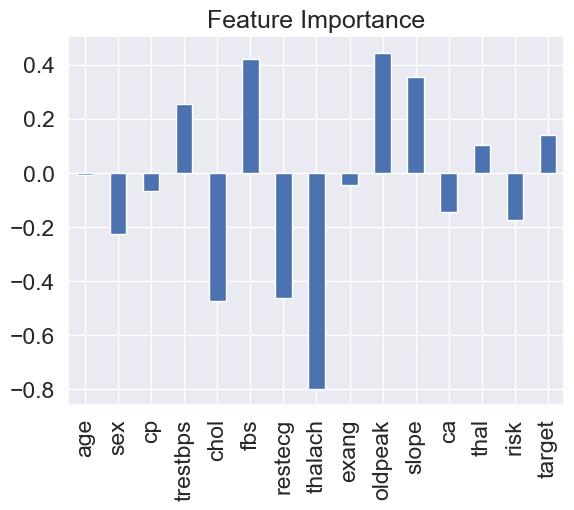

In [433]:
final_model = pipe.named_steps['clf']
features_dict2 = dict(zip(df.columns, list(final_model.coef_[0])))
features_df2 = pd.DataFrame(features_dict2, index=[0])
features_df2.T.plot.bar(title="Feature Importance", legend=False);
plt.savefig(r'pics/feature-importance-after-feature-engineering.png', bbox_inches='tight')

In [434]:
results

{'accuracy': 0.8446994535519124,
 'precision': 0.8207936507936507,
 'recall': 0.9212121212121213,
 'f1': 0.8673007976269721}

In [435]:
results2

{'accuracy': 0.848032786885246,
 'precision': 0.860009225526467,
 'recall': 0.8787878787878789,
 'f1': 0.8589253911601414}

In [436]:
list_of_results = [results, results2]

In [437]:
final_results = pd.DataFrame(list_of_results, index=['model_1', "model_2"])
final_results

,accuracy,precision,recall,f1
model_1,0.844699,0.820794,0.921212,0.867301
model_2,0.848033,0.860009,0.878788,0.858925


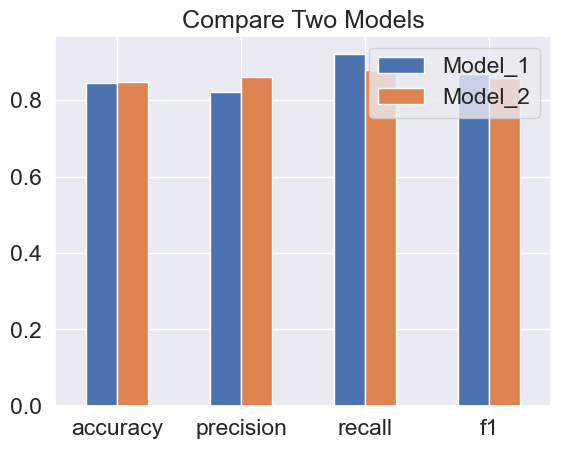

In [438]:
final_results_plot_df = pd.DataFrame({"Model_1": results, "Model_2":results2})

final_results_plot_df.plot.bar(title='Compare Two Models')
plt.xticks(rotation=0);
plt.savefig(r'pics/comparre-two-models.png', bbox_inches='tight')

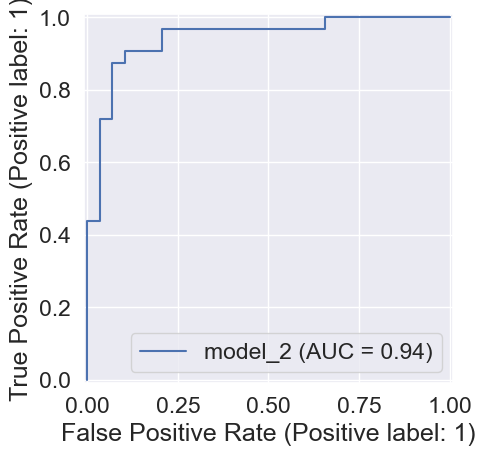

In [439]:
RocCurveDisplay.from_estimator(estimator=pipe,
                             X=xtest,
                             y=ytest,
                             name='model_2')
plt.savefig('pics/roc-curve-model2.png', bbox_inches='tight')

In [440]:
import joblib
joblib.dump(pipe, 'logistic_model.pkl')

['logistic_model.pkl']